In [27]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [28]:
# load in both toga and awas data pickles 
awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df_replace_twp.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df_twp.pkl")
#toga_df.drop('WIC', axis = 1)

In [44]:
# AWAS
# count number of samples per RF 
awas_utsamples = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)]
awas_utsamples.groupby('Flight').count()

,Time_UTC,Notes,Intrument,GGALT,GGLAT,GGLON,C2H6_Ethane,C2H2_Ethyne,C3H8_Propane,C4H10_Isobutane,...,C2Br2F4_Halon_2402,CH2BrCl_Bromochloromethane,CH2Br2_Methylene_bromide,CHBrCl2_Bromodichloromethane,CHBr2Cl_Dibromochloromethane,CHBr3_Bromoform,C2H5ONO2_Ethyl_nitrate,C3H7NO3_Isopropyl_nitrate,C4H9NO3_2_Butyl_nitrate,C4H9NO3_n_Butyl_nitrate
Flight,,,,,,,,,,,,,,,,,,,,,
RF05,16,16,16,16,16,16,16,16,16,16,...,16,16,16,10,16,16,16,16,16,16
RF06,11,11,11,11,11,11,11,11,11,11,...,11,10,11,11,11,11,11,11,11,11
RF07,13,13,13,13,13,13,13,13,13,13,...,12,13,13,12,12,13,13,13,13,13
RF08,12,12,12,12,12,12,12,12,12,12,...,12,10,12,12,12,12,12,12,12,12
RF09,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
RF10,13,13,13,13,13,13,13,13,13,13,...,12,12,13,9,13,13,13,13,13,13
RF11,12,12,12,12,12,12,12,12,12,12,...,12,12,12,9,12,12,12,12,12,12
RF12,27,27,27,27,27,27,27,27,27,27,...,25,25,27,27,27,27,27,27,27,27
RF13,40,40,40,40,40,40,40,40,40,40,...,39,39,40,33,40,40,40,40,40,40


In [43]:
# TOGA 
# count number of samples per RF 
toga_utsamples = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)]
toga_utsamples.groupby('Flight').count()

,Time_UTC,Notes,Intrument,GGALT,GGLAT,GGLON,Acetaldehyde,n_Butane,i_Butane,Benzene,C3H8,Methanol,Bromoform,Tetrachloroethylene,Dibromomethane,Dichloromethane,Chloroform,Carbon_Tetrachloride
Flight,,,,,,,,,,,,,,,,,,
RF03,39,39,39,39,39,39,22,39,39,39,39,39,39,39,39,39,39,39
RF04,90,90,90,90,90,90,74,87,87,87,87,86,87,87,87,87,87,87
RF05,96,96,96,96,96,96,66,95,95,95,95,95,95,95,95,95,95,95
RF06,39,39,39,39,39,39,28,39,39,39,39,37,39,39,39,39,39,39
RF07,44,44,44,44,44,44,33,43,43,43,43,43,43,43,43,43,43,43
RF08,48,48,48,48,48,48,37,48,48,48,48,48,48,48,48,47,48,48
RF09,48,48,48,48,48,48,34,48,48,48,48,45,48,48,48,48,48,48
RF10,75,75,75,75,75,75,59,65,65,65,65,65,65,65,65,65,65,65
RF11,54,54,54,54,54,54,29,52,52,52,52,52,52,52,52,52,52,52


In [30]:
### each RF 
toga_rf05 = toga_df.loc[(toga_df['Flight'] == 'RF05')]
toga_rf06 = toga_df.loc[(toga_df['Flight'] == 'RF06')]
toga_rf07 = toga_df.loc[(toga_df['Flight'] == 'RF07')]
toga_rf08 = toga_df.loc[(toga_df['Flight'] == 'RF08')]
toga_rf09 = toga_df.loc[(toga_df['Flight'] == 'RF09')]
toga_rf10 = toga_df.loc[(toga_df['Flight'] == 'RF10')]
toga_rf11 = toga_df.loc[(toga_df['Flight'] == 'RF11')]
toga_rf12 = toga_df.loc[(toga_df['Flight'] == 'RF12')]
toga_rf13 = toga_df.loc[(toga_df['Flight'] == 'RF13')]
toga_rf14 = toga_df.loc[(toga_df['Flight'] == 'RF14')]
toga_rf15 = toga_df.loc[(toga_df['Flight'] == 'RF15')]

### UT samples 
toga_rf05_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF05')]
toga_rf06_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF06')]
toga_rf07_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF07')]
toga_rf08_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF08')]
toga_rf09_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF09')]
toga_rf10_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF10')]
toga_rf11_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF11')]
toga_rf12_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF12')]
toga_rf13_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF13')]
toga_rf14_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF14')]
toga_rf15_ut = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                      & (toga_df['Flight'] == 'RF15')]

Text(0.5, 1.0, 'RF15')

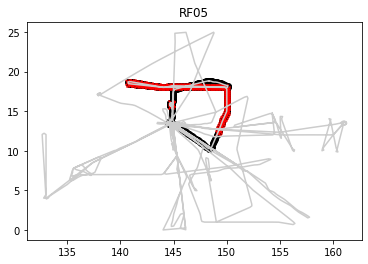

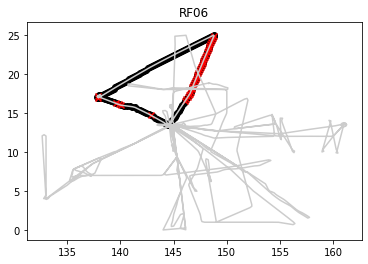

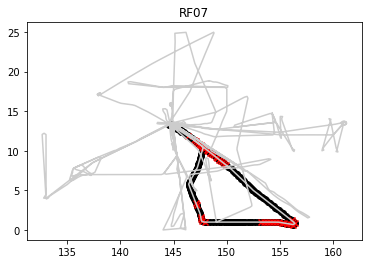

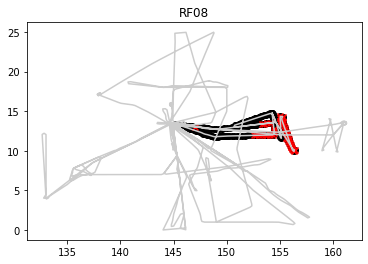

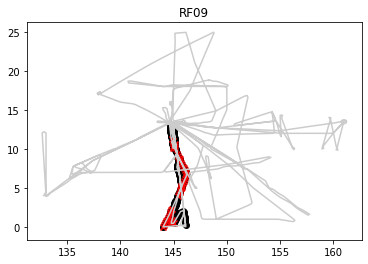

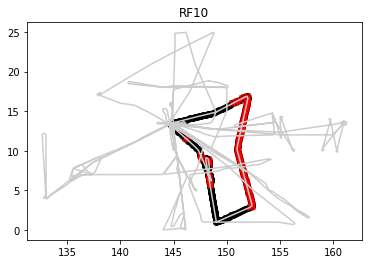

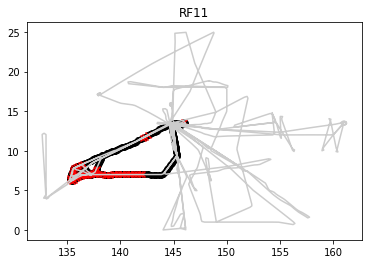

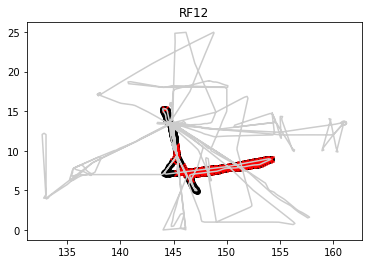

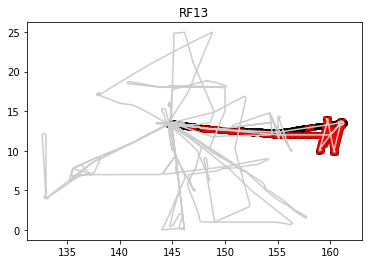

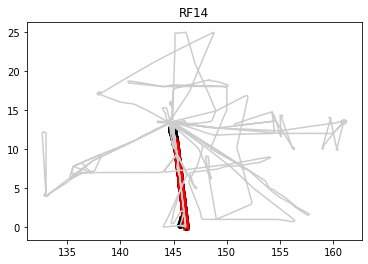

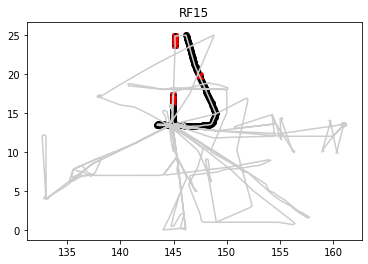

In [37]:
# RF05
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf05.GGLON, toga_rf05.GGLAT, color = 'k')
plt.scatter(toga_rf05_ut.GGLON, toga_rf05_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF05')

# RF06 
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf06.GGLON, toga_rf06.GGLAT, color = 'k')
plt.scatter(toga_rf06_ut.GGLON, toga_rf06_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF06')

# RF07
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf07.GGLON, toga_rf07.GGLAT, color = 'k')
plt.scatter(toga_rf07_ut.GGLON, toga_rf07_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF07')

# RF08 
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf08.GGLON, toga_rf08.GGLAT, color = 'k')
plt.scatter(toga_rf08_ut.GGLON, toga_rf08_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF08')

# RF09 
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf09.GGLON, toga_rf09.GGLAT, color = 'k')
plt.scatter(toga_rf09_ut.GGLON, toga_rf09_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF09')

# RF10 
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf10.GGLON, toga_rf10.GGLAT, color = 'k')
plt.scatter(toga_rf10_ut.GGLON, toga_rf10_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF10')

# RF11
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf11.GGLON, toga_rf11.GGLAT, color = 'k')
plt.scatter(toga_rf11_ut.GGLON, toga_rf11_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF11')

# RF12
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf12.GGLON, toga_rf12.GGLAT, color = 'k')
plt.scatter(toga_rf12_ut.GGLON, toga_rf12_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF12')

# RF13
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf13.GGLON, toga_rf13.GGLAT, color = 'k')
plt.scatter(toga_rf13_ut.GGLON, toga_rf13_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF13')

# RF14
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf14.GGLON, toga_rf14.GGLAT, color = 'k')
plt.scatter(toga_rf14_ut.GGLON, toga_rf14_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF14')

# RF15 
fig = plt.figure()
plt.plot(toga_df.GGLON, toga_df.GGLAT, color = [0.8, 0.8, 0.8])
plt.scatter(toga_rf15.GGLON, toga_rf15.GGLAT, color = 'k')
plt.scatter(toga_rf15_ut.GGLON, toga_rf15_ut.GGLAT, color = 'r', marker = 'x')
plt.title('RF15')
